# **IMPORT THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ARIMA

# **LOAD AND AUDIT THE DATA**

In [ ]:
data = pd.read_csv('/content/Super_Store.csv',encoding = 'latin_1')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
cols = ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

In [ ]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
data1 = data.loc[:,['Order Date','Sales']]

In [ ]:
data1=data1.sort_values("Order Date")

In [ ]:
data1.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


In [ ]:
data1["Order Date"]=pd.to_datetime(data1["Order Date"])
data1.set_index("Order Date",inplace=True)
data1.index

DatetimeIndex(['2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2014-01-10', '2015-01-10', '2016-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11',
               ...
               '2017-09-08', '2014-09-09', '2014-09-09', '2014-09-09',
               '2016-09-09', '2017-09-09', '2017-09-09', '2017-09-09',
               '2017-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [ ]:
y = data1['Sales'].resample('MS').mean()

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 48 entries, 2014-01-01 to 2017-12-01
Freq: MS
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [ ]:
y

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

<Axes: xlabel='Order Date'>

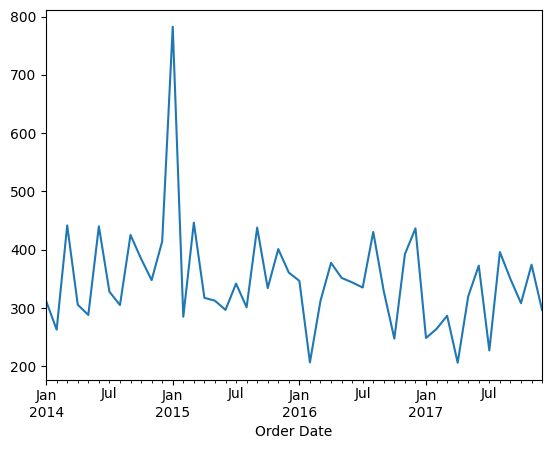

In [ ]:
y.plot()

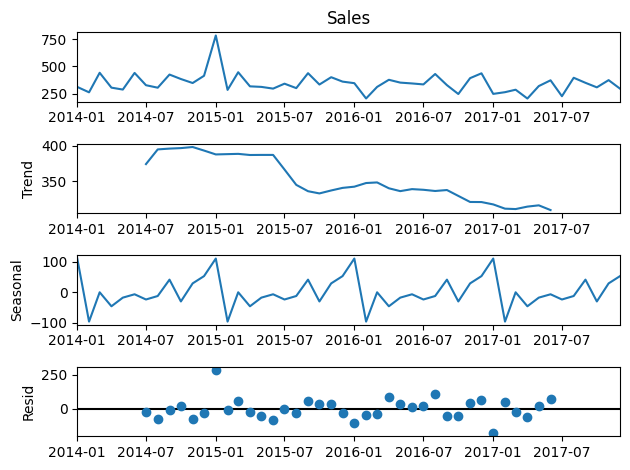

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = y
result = seasonal_decompose(series, model = 'additive')
result.plot()
pyplot.show()

In [ ]:
# perform the ADF test
result = adfuller(y)



*   NULL HYPOTHESIS: THERE IS NO STATIONARITY
*   ALTERNATE HYPOTHESIS: STATIONARITY



In [ ]:
print("ADF statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critical values:")
for key, value in result[4].items():
    print('\t%s: %.3f'%(key,value))

ADF statistic: -6.962405
p-value: 0.000000
Critical values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


In [ ]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

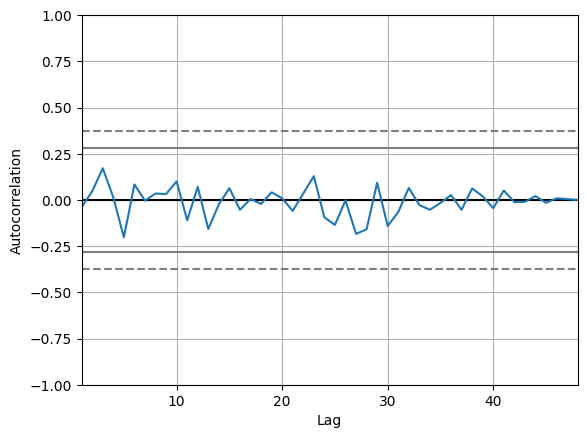

In [ ]:
autocorrelation_plot(y)

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(y,order=(0, 1, 1))
result = model.fit()

In [ ]:
forecast=result.predict(start='2014-01-01',end='2018-10-01')

In [ ]:
forecast

2014-01-01      0.000000
2014-02-01    309.743558
2014-03-01    286.309537
2014-04-01    338.364007
2014-05-01    330.045048
2014-06-01    321.416886
2014-07-01    342.044674
2014-08-01    339.904631
2014-09-01    335.191471
2014-10-01    346.246926
2014-11-01    350.572671
2014-12-01    350.282563
2015-01-01    356.619820
2015-02-01    396.762012
2015-03-01    386.689700
2015-04-01    391.864382
2015-05-01    385.631742
2015-06-01    379.684197
2015-07-01    373.105767
2015-08-01    370.683335
2015-09-01    365.399999
2015-10-01    370.819903
2015-11-01    368.112173
2015-12-01    370.508410
2016-01-01    369.803877
2016-02-01    368.142575
2016-03-01    356.729436
2016-04-01    353.607790
2016-05-01    355.272018
2016-06-01    355.019206
2016-07-01    354.256655
2016-08-01    352.940387
2016-09-01    358.244273
2016-10-01    356.213443
2016-11-01    348.808927
2016-12-01    351.765860
2017-01-01    357.512996
2017-02-01    350.146028
2017-03-01    344.339736
2017-04-01    340.454122


In [ ]:
y

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
actual=y
predicted = forecast['2014-01-01':'2017-12-01']

In [ ]:
rmse_model = np.sqrt(mean_squared_error(actual,predicted))
print(rmse_model)

102.5941492979255


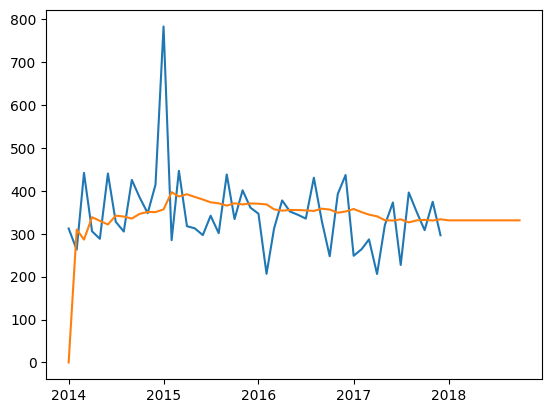

In [ ]:
plt.plot(y)
plt.plot(forecast)
plt.show()